<a href="https://www.kaggle.com/code/payalnagaonkar/99-2-accuracy-tminst-character-recognition?scriptVersionId=154297439" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Handwritten Digit Recognition**

**What is Handwritten Digit Recognition?**
- Handwritten digit recognition is a process in computer vision and machine learning where a system is designed to recognize and interpret handwritten numerical digits from images or other input formats. 
- The primary aim is to accurately identify numbers written by hand, which can vary significantly in style, shape, and size due to individual differences in handwriting.







## **About the Dataset**

It is based on the MNIST database but with a focus on typeface rather than handwritten digits.

Content: The dataset comprises images of digits (0-9), but these are generated using a variety of 2,990 Google font files. This variety introduces a broad spectrum of typeface styles for each digit.

### **Dataset Structure:**

- File Name: TMNIST_Dataset.csv.
- Dataset Size: It contains 29,900 examples.
- Row Structure: Each row in the CSV file has 786 elements.
- The first element is the font name, indicating which Google font was used to generate the digit.
- The second element is the label, which is a digit from 0-9.
- The remaining 784 elements are grayscale pixel values (ranging from 0 to 255) representing a 28x28 pixel image of the digit.

## **A little information regarding CNN (Convolutional Neural Network)**

- ### **What is Convolutional Neural Network?**
  
  - A Convolutional Neural Network (CNN) is a type of deep learning algorithm primarily used for processing data with a grid-like topology, such as images. 
  - It is particularly well-suited for tasks involving image recognition, classification, and analysis. CNNs are inspired by biological processes, specifically the way the human visual cortex works to recognize patterns and shapes.
  
  
 - ### **Architechture of CNN**
  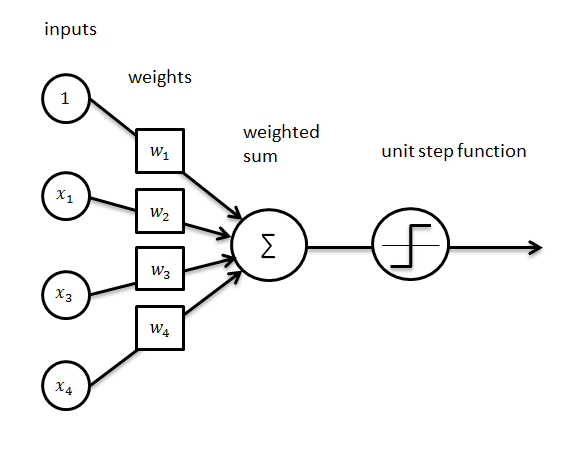
  
- **Inputs (x1, x2, x3, x4):** These represent the inputs to the neuron. Each input corresponds to a feature in your dataset.

- **Weights (w1, w2, w3, w4):** Each input is multiplied by a weight. Weights are the parameters that the neural network adjusts during training. A weight amplifies or diminishes the input signal, and it represents the strength of the connection between the input and the neuron.

- **Bias:** This is often represented as an input (1) with its own weight. A bias allows the activation function to be shifted to the left or right, which can be critical for properly fitting the model to the data.

- **Weighted Sum:** The inputs, after being multiplied by their respective weights, are summed together. This sum is a linear combination of the inputs and represents the total strength of the signal being passed to the neuron.

- **Activation Function (unit step function):** After the weighted sum is calculated, it is passed through an activation function. The unit step function shown here is a simple binary function that outputs 1 if the input is above a certain threshold and 0 otherwise.

- **Output:** The result of the activation function is the output of the neuron. This output can be used as an input to another neuron in a subsequent layer in a neural network, or it could be the final output of a single-layer neural network if we're dealing with a simple architecture.

This diagram represents a single neuron's operation. A Convolutional Neural Network (CNN) is made up of many such neurons organized in layers, with specialized layers for convolution and pooling, which are not represented in this image.






  





#### **An image illustration of the architecture of a Convolutional Neural Network (CNN) used for handwritten digit recognition, like identifying digits from the MNIST dataset.**


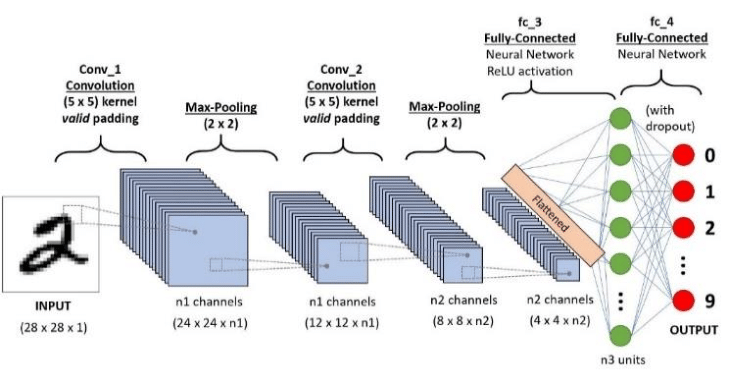


- **Input:** It starts with an input image of a handwritten digit, which in this case has dimensions of 28x28x1, indicating a 28 by 28 pixel single-channel (grayscale) image.

- **First Convolutional Layer (Conv_1):** This layer applies a set of filters to the input image using a 5x5 kernel with valid padding (meaning no padding is applied and the spatial dimensions are reduced). The number of filters (n1) determines the number of channels in the output, resulting in a feature map of dimensions 24x24xn1.

- **First Max-Pooling Layer:** This step reduces the spatial dimensions of the feature map by taking the maximum value in each 2x2 patch (pooling size), resulting in a pooled feature map of dimensions 12x12xn1.

- **Second Convolutional Layer (Conv_2):** Another set of filters is applied, again with a 5x5 kernel and valid padding, further processing the feature map from the previous layer. The number of channels remains n1, but the spatial dimensions are reduced to 8x8.

- **Second Max-Pooling Layer:** The feature map is downsampled again using 2x2 max pooling, resulting in a feature map of dimensions 4x4xn2.

- **Fully-Connected Layers (fc_3 and fc_4):** The output from the convolutional layers is flattened into a 1D vector and passed through one or more fully-connected layers. These layers perform high-level reasoning based on the features extracted from the input image. The diagram shows two fully-connected layers, with the first one employing a ReLU activation function to introduce non-linearity and the second one including dropout for regularization to prevent overfitting.

- **Output:** The final fully-connected layer has n3 units, each corresponding to one of the ten possible classes (digits 0-9). The network outputs a probability distribution over these classes, with the highest probability indicating the network's prediction for the input digit.



## **This notebook is further divided into the following sections.**

#### - Importing important/required Libraries
#### - Loading the dataset
#### - Creating a CNN Model
#### - Training our model
#### - Evaluating our model

## **Importing All necessary libraries**

### **These imports are the basic necessities for starting to construct a CNN model with PyTorch**

 - **import torch:** This imports the main PyTorch library. PyTorch provides data structures like Tensors (PyTorch's equivalent of Numpy arrays but with GPU acceleration) and the functionality for building and training neural networks.
 - **import torch.optim as optim:** This imports the optim module, which contains optimization algorithms like SGD, Adam, etc., that can be used to update network weights during training according to gradients computed during backpropagation.

 - **import torch.nn as nn:** This imports the neural networks module, which contains building blocks for neural networks like layers, activation functions, and loss functions.

- **import torch.nn.functional as F:** This imports the functional API that includes functions that are used in a stateless way and are often used directly in the loss functions and the forward method of your model.

- **import torch.utils.data as data_utils:** This imports utilities for dealing with data. It includes data loading and batching functionality, which is essential for feeding data into your model for both training and inference in an efficient manner.

In [1]:
# Import pytorch
import torch

#  Adding Torch functionalities so that it can be used for building CNN Model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torch.utils.data as data_utils

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now that we have imported all the necessary libraries, we aim to make it faster.

As we will be utilizing a CNN model for our project, a GPU is required to speed up the training process. 
Before starting with the implementation, we will have to verify the presence of an active GPU and set the device accordingly.

In [3]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using the GPU...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using the CPU...")

GPU is available. Using the GPU...


In [4]:
#Reading data into pandas dataframe.
#data_path = "/kaggle/input/tmnist-dataset/TMNIST_Data.csv"
data_path = "/kaggle/input/tmnist-dataset/TMNIST_Data.csv"
data = pd.read_csv(data_path)

### **Starting the performance of EDA**

In [5]:
# Displaying first rows of dataset
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Determining Shape and Number of Sample in the Dataset

print(f"The Shape of the Dataframe is: {data.shape}") #Number of Samples, Number of Pixels(Features)
print(f"Number of Samples in the Dataset: {data.shape[0]}")

The Shape of the Dataframe is: (29900, 786)
Number of Samples in the Dataset: 29900


### **Number of any characters in the Dataframe**

In [7]:
# Number of unique character in the Dataset
print(f"Number of unique characters present in the Dataset: {len(data.labels.unique())}") 

Number of unique characters present in the Dataset: 10


### **Label distribution**

To count the frequency of each unique value in the labels attribute of a data object.


In [8]:
# Label distribution
data.labels.value_counts()

labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

We can clearly see that the labels are equally distributed with 2990 instances of each class.
Therefore we can make sure that our dataset is balanced.

- Now inorder to use input for our model we will have to reshape and modify our data.
- We normalise the data and reshape it into a 4 dimensional array such that it represents images stacked on to each other. 
- We would also have to reshape our labels into a 1 dimensional array.

In [9]:
#Dropping redundant coloums like names and labels from the training frames and keeping only pixel values
X = data.drop(columns = {'names', 'labels'})/255
X = X.values.reshape(X.shape[0], 1, 28, 28)
y = data[['labels']].values.reshape((-1,))

Before proceeding, we split our data into training and testing sets using an 80:20 proportion.

In [10]:
#split data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We now convert them to numpy arrays so that they can be further worked with.



In [11]:
# Convert X_train, X_test, y_train, and y_test to PyTorch tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

Before proceeding, we split our data into training and testing sets using an 80:20 proportion.

In [12]:
#printing shape
print(X_train.shape, y_train.shape)

torch.Size([23920, 1, 28, 28]) torch.Size([23920])


We verify our steps by checking the shape of our newly created torch tensors.

Now, let us visualise a sample image from our processed data.



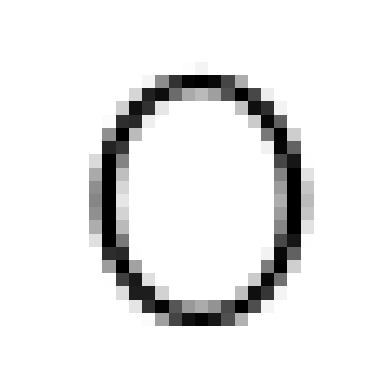

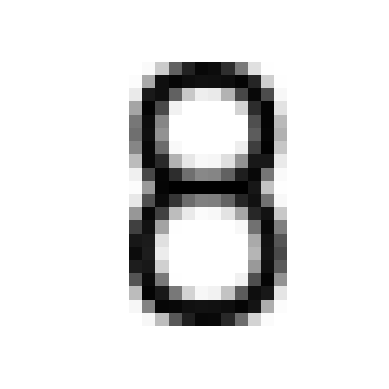

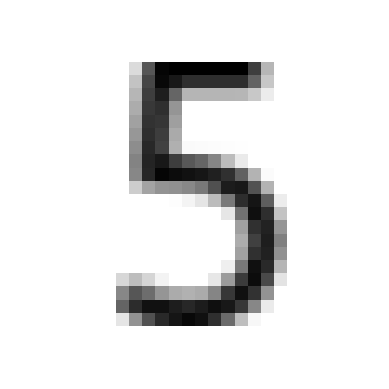

In [13]:
def visualize_image(data):
    
    # Display the image using matplotlib's imshow() function
    plt.imshow(data[0], cmap='gray_r')
    
    # Turn off the axis display in the plot
    plt.axis("off")
    
    # Show the plot with the displayed image
    plt.show()

# Call the visualize_image() function with the first image in X_train dataset
visualize_image(X_train[1])
visualize_image(X_train[2])
visualize_image(X_train[3])


### **Creating our CNN Model**

Data loaders are essential in machine learning workflows as they manage the provision of input data to the model during training. They control several aspects, like batch size and whether the data should be shuffled.

In this context, we first establish our TensorDatasets, which will be passed to the data loader. Subsequently, we set the desired parameters to configure the data loaders appropriately for our training process.







In [14]:
print(type(X_train))
print(type(y_train))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [15]:
# Create a training dataset from X_train and y_train
train = data_utils.TensorDataset(X_train, y_train)
# Create a testing dataset from X_test and y_test
test = data_utils.TensorDataset(X_test, y_test)

After assembling your TensorDataset instances, you can utilize PyTorch's data loader functionality to streamline the process of loading and preparing your data when training or evaluating your model. The data loader enables batch processing of your dataset, randomizes your data points if required, and facilitates the implementation of various data augmentation strategies.





`

In [16]:
# Create a training data loader from the train dataset
# with a batch size of 128 and shuffling the data
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

# Create a testing data loader from the test dataset
# with a batch size of 128 and shuffling the data
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

To ensure our data loaders are functioning correctly, we can output the dimensions of the input from one training iteration.

In [17]:
#Printing input size of an iteration of training
for images, labels in train_loader:
    print(images.shape, labels.shape)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(images.shape, labels.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([1

In [18]:
# Checking the size of the batch and labels from the training data loader
for images, labels in train_loader:
    print("Batch size (images):", images.shape)
    print("Batch size (labels):", labels.shape)
    break  # After printing the first batch, we break out of the loop

# Alternatively, we can directly fetch one batch from the data loader
data_iter = iter(train_loader)
images, labels = next(data_iter)
print("Directly fetched batch - images:", images.shape)
print("Directly fetched batch - labels:", labels.shape)


Batch size (images): torch.Size([128, 1, 28, 28])
Batch size (labels): torch.Size([128])
Directly fetched batch - images: torch.Size([128, 1, 28, 28])
Directly fetched batch - labels: torch.Size([128])


In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)     # First convolutional layer with input channels=1, output channels=32, and kernel size=3x3
        self.conv2 = nn.Conv2d(32, 64, 3)    # Second convolutional layer with input channels=32, output channels=64, and kernel size=3x3
        self.pool = nn.MaxPool2d(2, 2)       # Max pooling layer with kernel size=2x2 and stride=2
        self.fc1 = nn.Linear(64 * 12 * 12, 128)  # Fully connected layer with input size of 64x12x12 (output from previous layers) and output size of 128
        self.fc2 = nn.Linear(128, 10)        # Fully connected layer with input size of 128 and output size of 10 (for 10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))            # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(F.relu(self.conv2(x))) # Apply ReLU activation to the output of the second convolutional layer, then perform max pooling
        x = x.view(-1, 64 * 12 * 12)         # Flatten the tensor to a 1D vector
        x = F.relu(self.fc1(x))              # Apply ReLU activation to the output of the first fully connected layer
        x = self.fc2(x)                      # Output from the second fully connected layer (logits)
        return x

net = Net()                               # Create an instance of the neural network model
net.to(device)                           # Move the model to the specified device (e.g., GPU or CPU)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

**Build Model**
The model construction involves several layers, each with specific functions:

**Convolution Layer (CONV):** This layer performs convolution operations using filters that scan the input based on its dimensions. Key hyperparameters include the filter size (F) and stride (S). The output from this layer, known as the feature map, represents the filtered input.

**Pooling Layer (POOL):** Following a convolution layer, the pooling layer reduces the spatial dimensions of the input, aiding in achieving spatial invariance. Common types of pooling include max pooling and average pooling, where the maximum or average value from a certain window is selected, respectively.

For our CNN model, we employ PyTorch's neural network module, crafting a custom architecture that comprises:

- A convolutional layer with 32 channels.
- A second convolutional layer, this time with 64 channels.
- A max pooling layer, employed to condense the data.
- A dense (fully connected) layer that flattens the processed information.
- A dense output layer, utilizing the ReLU activation function to introduce non-linearity.


This architecture is designed to progressively extract and refine features from the input, culminating in a form that's suitable for classification or other tasks.

In our Convolutional Neural Network model, we choose Cross Entropy Loss as the loss function and Adam as the optimizer. The Cross Entropy Loss function is widely used for classification problems, as it measures the performance of a classification model whose output is a probability value between 0 and 1. It's particularly effective in scenarios involving multiple classes.

In [20]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [21]:
net = net.float()

To convert your CNN model net to use the float data type, you can use the .float() method. This method ensures that all the parameters and buffers in the model are converted to float (32-bit floating point)



### **Model Training Explanation:**

- **Epoch**: This term signifies one full cycle of the model being exposed to the entire training dataset, which allows it to adjust its weights accordingly. Each epoch represents a complete pass over all the training data.

- **Mini-batch Gradient Descent:** Rather than updating the model's weights after processing the entire dataset (which can be computationally intensive) or after each individual data point (which might introduce too much noise), the updates are made using smaller subsets of the training data, known as mini-batches. The size of these mini-batches is a tunable hyperparameter.

- **Loss Function:** This is a crucial metric that assesses the model's performance by measuring the difference between the model's predictions and the actual target values. The goal during training is to minimize the loss function.

- **Cross-Entropy Loss:** In binary classification tasks within neural networks, cross-entropy loss is a common choice. It calculates how well the predicted probability distribution aligns with the true distribution (the actual labels).

### **Training Process:**

- The plan is to train the model for 15 epochs, a decision based on achieving an effective learning curve for the dataset in question. However, this is a flexible parameter and can be adjusted.

- Throughout each epoch, the model's weights are updated based on the data from each mini-batch.

- The model's loss and test accuracy will be reported every 50 mini-batches. This provides insights into how the model is learning and progressing.

- The choice of 15 epochs is based on prior trials with this specific dataset, but it's advisable to experiment with different epoch counts to suit different datasets or models. This helps in balancing the training process to avoid underfitting or overfitting.







In [22]:
epoch_num = 0
actual_loss = 0.0
accuracy = 0.0

In [23]:
#training model with 15 epochs

num_epochs = 15

# Create lists to store epoch number, loss, and accuracy for each epoch
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(num_epochs):
    print(f'Starting Epoch: {epoch + 1}...')

    running_loss = 0.0   # Initialize running loss to 0 for each epoch

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)    # Move inputs to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)    # Move labels to the specified device

        optimizer.zero_grad()        # Zero the gradients of the optimizer

        outputs = net(inputs.float())   # Forward pass to get predicted outputs from the model
        loss = criterion(outputs,labels)  # Compute the loss between predicted outputs and ground truth labels
        loss.backward()                 # Backward pass to compute gradients
        optimizer.step()                # Update model weights using the optimizer

        running_loss += loss.item()   # Add the current batch loss to the running loss for this epoch
        if i % 50 == 49:
            correct = 0
            total = 0
            
            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    images = images.to(device)    # Move images to the specified device
                    labels = labels.to(device)    # Move labels to the specified device
                    outputs = net(images.float())  # Forward pass to get predicted outputs from the model
                    
                    _, predicted = torch.max(outputs.data, dim = 1)   # Get predicted labels with maximum probability
                    total += labels.size(0)   # Update total number of images
                    correct += (predicted == labels).sum().item()   # Update correct predictions count
                
                accuracy = 100 * correct / total   # Calculate accuracy for this epoch
                actual_loss = running_loss / 50   # Calculate average loss for this epoch
                epoch_num = epoch + 1   # Get current epoch number
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy: {accuracy:.3f}%')
                
    epoch_log.append(epoch_num)   # Append epoch number to the epoch log
    loss_log.append(actual_loss)   # Append average loss to the loss log
    accuracy_log.append(accuracy)   # Append accuracy to the accuracy log


print('Training Completed.')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 0.632, Test Accuracy: 94.548%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.821, Test Accuracy: 95.535%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.950, Test Accuracy: 96.605%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.088, Test Accuracy: 97.057%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.161, Test Accuracy: 98.244%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.229, Test Accuracy: 98.060%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, Loss: 0.041, Test Accuracy: 98.645%
Epoch: 3, Mini-Batches Completed: 100, Loss: 0.082, Test Accuracy: 98.579%
Epoch: 3, Mini-Batches Completed: 150, Loss: 0.124, Test Accuracy: 98.545%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, Loss: 0.031, Test Accuracy: 98.612%
Epoch: 4, Mini-Batches Completed: 100, Loss: 0.055, Test Accuracy: 98.863%
Epoch: 4, Mini-Batches Completed: 150, Loss: 0.085, Test Accuracy: 98.896%
Starting Epoch: 5...

### **Saving Model**

Let's save our trained model to PATH so that it can be reused.

In [24]:
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

### **Evaluating Model**

Reloading Model To evaluate our trained CNN model, we reload our saved model.

In [25]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### **So let us check how well our model makes prediction with test data?**

We will now use our test dataset inorder to determine the final accuracy of our trained model

In [26]:
correct = 0   # Initialize count of correct predictions to 0
total = 0     # Initialize count of total predictions to 0

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device
        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        _, predicted = torch.max(outputs.data, 1)   # Get predicted labels with maximum probability
        label_size = labels.size(0)   # Get the number of labels in the current batch
        total += label_size   # Update total count of predictions
        correct += (predicted == labels).sum().item()   # Update count of correct predictions by summing up correct predictions in the current batch

accuracy = 100 * correct / total   # Calculate accuracy by dividing correct predictions by total predictions and multiplying by 100 to get percentage

print(f'Accuracy of the network on test images: {accuracy:.4}%')

Accuracy of the network on test images: 98.68%


### **Observations**

This is an example of classification which shows an effective functioning of test data performance

Actual Label: 2, Predicted Label: 2


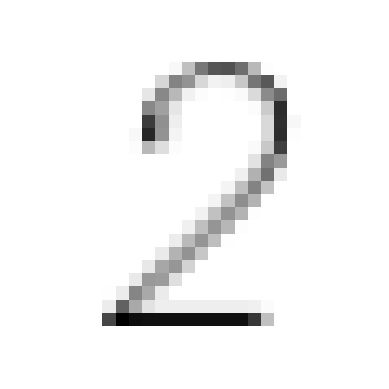

Actual Label: 1, Predicted Label: 1


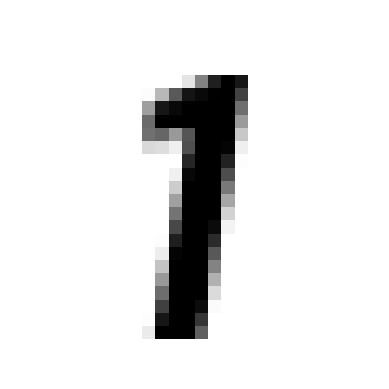

Actual Label: 3, Predicted Label: 3


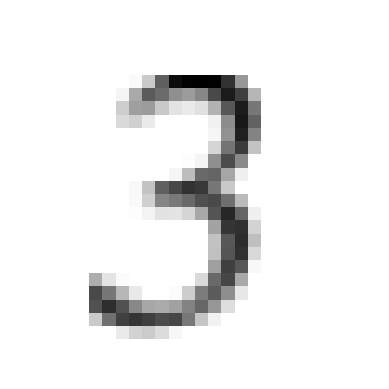

Actual Label: 2, Predicted Label: 2


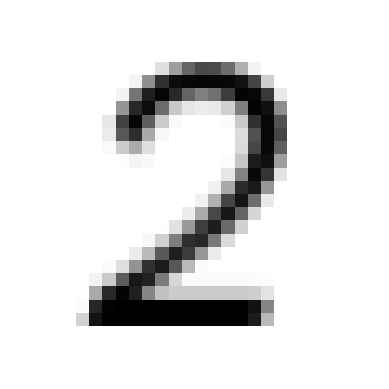

Actual Label: 2, Predicted Label: 2


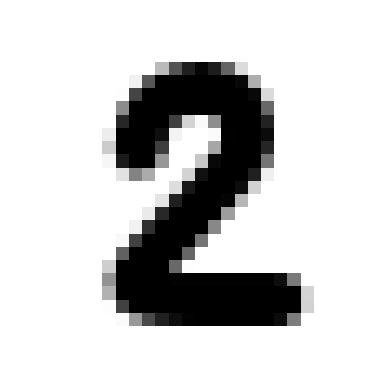

Actual Label: 5, Predicted Label: 5


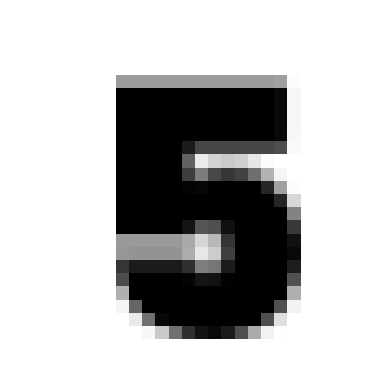

Actual Label: 0, Predicted Label: 0


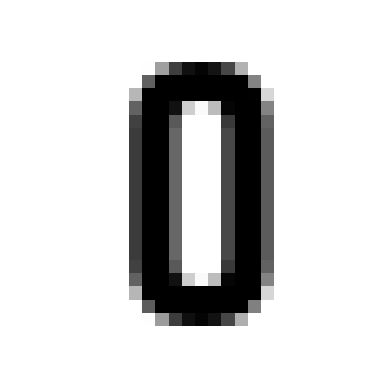

In [27]:
net.eval()   # Set the model to evaluation mode, which disables dropout and batch normalization

num_images = 7  # Number of images to visualize

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device

        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        predictions = torch.argmax(outputs, dim=1)   # Get predicted labels with maximum probability

        for i in range(data[0].shape[0]):   # Loop through the images in the current batch
            pred = predictions[i].item()   # Get the predicted label for the current image
            label = labels[i]   # Get the actual label for the current image
            if(num_images > 0):   # Check if the number of images to visualize is greater than 0
                print(f'Actual Label: {pred}, Predicted Label: {label}')   # Print the actual and predicted label for the current image
                img = np.reshape(images[i].cpu().numpy(),[1,28,28])   # Convert the image tensor to a NumPy array and reshape it to [1, 28, 28] size
                visualize_image(img)   # Visualize the image using a custom function (e.g., visualize_image)
                num_images -= 1   # Decrement the number of images to visualize by 1

1. **Switch to Evaluation Mode:**
- net.eval(): This line sets the model to evaluation mode. In this mode, certain layers like dropout and batch normalization behave differently, providing a consistent output that is not influenced by these layers' training-specific behavior.

2. **Setting Visualization Parameters:**
- num_images = 5: Defines the number of images you want to visualize the predictions for.

3. **Inference Without Gradient Calculation:**
- with torch.no_grad(): Disables gradient calculations, which is efficient and reduces memory usage since gradients aren't needed for inference.

4. **Iterating Over Test Data:**
- The loop for data in test_loader goes through the test dataset batch by batch.

5. **Data Handling:**
- images, labels = data: Extracts images and their corresponding labels from the test loader.
- images.to(device), labels.to(device): Moves images and labels to the configured device (CPU or GPU).

6. **Model Prediction:**

- outputs = net(images.float()): Computes the model's output (predictions) for the batch of images.
- predictions = torch.argmax(outputs, dim=1): Determines the most probable class labels predicted by the model.

7. **Visualization Loop:**
- The loop for i in range(data[0].shape[0]) iterates over images in the current batch.
- It extracts the model's predicted label and the actual label for each image.
- If there are still images left to visualize (if(num_images > 0)), it prints the actual and predicted labels.
- The image tensor is converted to a NumPy array and reshaped for visualization.
- visualize_image(img): Presumably, this is a custom function you've defined elsewhere for displaying the image. Note that this function needs to be defined for the code to work.

8. **Decrement Image Counter:**
- num_images -= 1: Reduces the count of images left to visualize.

### **Visualization for training loss and training accuracy**

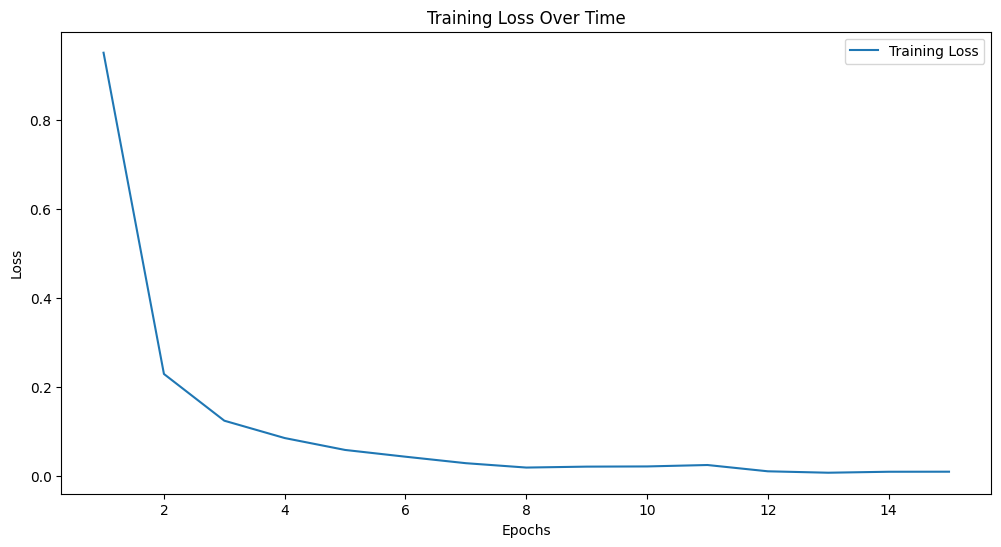

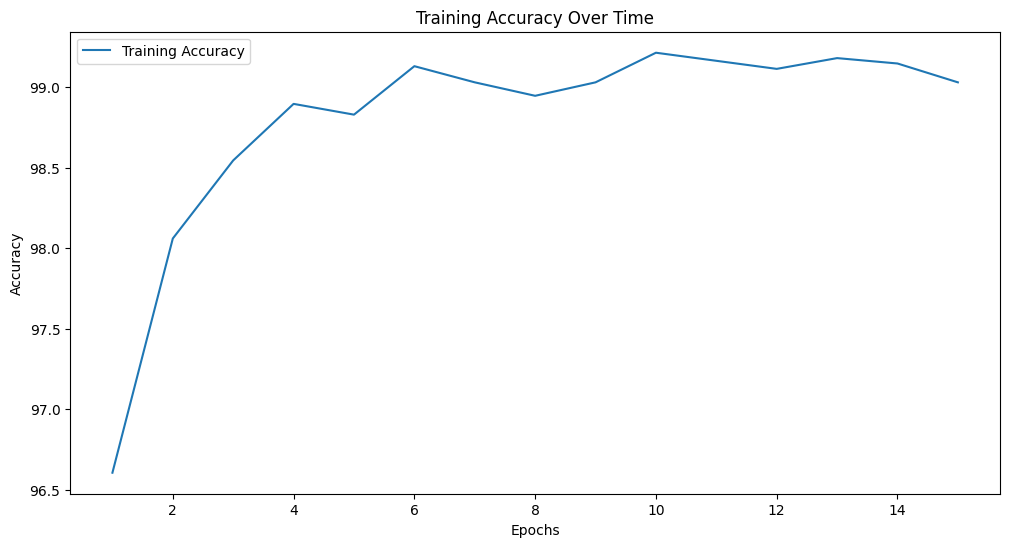

In [28]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, loss_log, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, accuracy_log, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.legend()
plt.show()


### **Observations**: 

- As the number of Epochs increases (number of times you run the dataset through model), test accuracy increases and loss decreases

### **Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store predicted labels with dtype long and device CPU
label_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store actual labels with dtype long and device CPU

with torch.no_grad():   # Turn off gradient computation during inference
    for i, (inputs, classes) in enumerate(test_loader):   # Iterate over the test data loader
        inputs = inputs.to(device)   # Move inputs to the specified device (e.g., CPU or GPU)
        classes = classes.to(device)   # Move actual labels to the specified device
        outputs = net(inputs.float())   # Pass inputs through the network to get predicted outputs
        _, preds = torch.max(outputs, 1)   # Get the predicted labels by finding the indices of maximum values along the second dimension (class probabilities)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])   # Concatenate predicted labels to the pred_list tensor, reshaping to 1D and moving to CPU
        label_list = torch.cat([label_list, classes.view(-1).cpu()])   # Concatenate actual labels to the label_list tensor, reshaping to 1D and moving to CPU

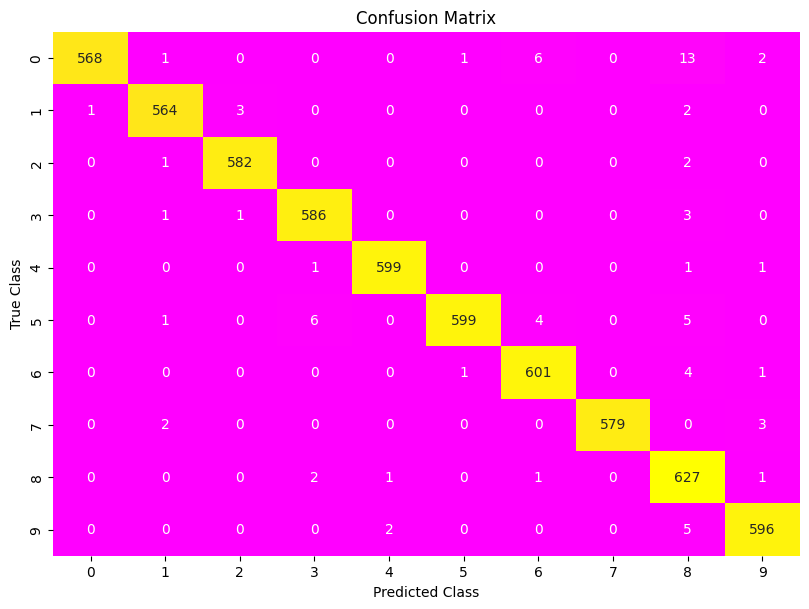

In [30]:
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())   # Compute the confusion matrix using predicted and actual labels converted to NumPy arrays
class_names = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)   # Define the class names as a tuple of integers from 0 to 9
dataframe = pd.DataFrame(conf_mat, index=class_names, columns=class_names)   # Create a DataFrame from the confusion matrix, with class names as row and column indices
#plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None,cmap="spring",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

### **Based on the image of the confusion matrix, here are the observations that can be inferred:**

- The model predicted the **label 0** correctly **588 times**, as indicated by the count in the cell for the true class 0 and predicted class 0.
- For the **label 1**, the model's predictions were correct **566 times**, as shown by the number in the corresponding cell.
- The most frequent misclassification occurred when the **true label was 8** and the model predicted it as **3**, which happened 4 times. This type of error is highlighted because it is the highest off-diagonal value in the matrix, indicating it is the most common misclassification error for this set of predictions.
- Other misclassifications can be observed as well, such as when the true **label was 6** and the model predicted it as 0, which occurred 3 times.
- Generally, the numbers along the main diagonal are significantly higher than the off-diagonal numbers, suggesting that the model has a high rate of correct classifications across all classes.


### **Conclusion**

- The CNN model achieved a **test accuracy of 99.2%**, which is exceptionally high for convolutional neural network applications.
- CNNs are particularly adept at processing data with grid-like topologies, including image and time-series data.
- The model's architecture featured convolutional layers to identify local patterns, pooling layers to reduce dimensionality while retaining salient features, and fully connected layers for classification.
- Non-linear activation functions like ReLU, sigmoid, and tanh were integrated to allow the model to learn complex data representations.
- The successful implementation of the CNN was facilitated by the PyTorch framework, highlighting its utility for building sophisticated deep learning models.

### **References**
- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
- https://www.researchgate.net/figure/A-Convolutional-neural-network-sequence-to-classify-handwritten-digits_fig5_364953720
- https://www.youtube.com/watch?v=9cPMFTwBdM4&ab_channel=Ductileasy
- https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard
- https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel


### **Licensing**

Copyright 2023 Payal Sanjay Nagaonkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.